# Exercise 02 - Neural Networks for Regression in Keras

## Part I - Exploratory Data Analysis

The overall objective of this exercise is to to build and train a neural network model for predictiong housing prices in California using the California census data. By learning from this data, the model should be able to predict the **median house price of any district**, given all the input attributes. In this first part of the exercise, we apply some statistics and visualization techniques in order to explore and getting to know the data.

**Learning Objectives:**

- Learn how to perform Exploratory Data Analysis in order to get insight into the dataset.

## Dataset

In this exercise, we use the [California Housing dataset](https://scikit-learn.org/stable/datasets/index.html) from the StatLib repository (http://lib.stat.cmu.edu/datasets/). This dataset was derived from the 1990 U.S. census, having one *row per census block group*. A **block group** is the smallest geographical unit for which the U.S. Census Bureau publishes sample data. A census block group typically covers a population of 600 to 3,000 people. For the sake of brevity, we call these census block groups in this exercise "disctricts".

The original dataset appeared in R. Kelley Pace and Ronald Barry, “Sparse Spatial Autoregressions,” Statistics & Probability Letters 33, no. 3 (1997): 291–297. Although it is not very recent, it has many qualities for learning how to build data driven models. The dataset comes in tabular form, comprising more than 20,600 records with 8 columns or attributes (features) such as population, median income, median housing price, and so on for each *census block group* in California:

- MedInc - median income in block
- HouseAge - median house age in block
- AveRooms - average number of rooms
- AveBedrms - average number of bedrooms
- Population - block population
- AveOccup - average house occupancy
- Latitude - house block latitude
- Longitude - house block longitude

The target variable is the median house value for California districts.

First, we create a new directory called `datasets` in the current path `.` where the data is to be stored, if that directory does not exist.

In [1]:
import os

if not os.path.exists('./datasets'):
    os.mkdir('./datasets')

The housing prices dataset can be (down)loaded using the sklearn function `fetch_california_housing()` from the [datasets module](https://scikit-learn.org/stable/datasets/index.html), which stores the data in a user specified home directory `data_home`, and also returns the input features and target values.

In [2]:
#from sklearn.datasets import fetch_california_housing
#X_full, y_full = fetch_california_housing(data_home = r'./datasets', return_X_y=True) 


#Using the sklearn API you can import the california dataset from the other types in the real world 
# dataset group.

from sklearn import datasets

X_full, y_full=datasets.fetch_california_housing(data_home = r'./datasets',download_if_missing=True, return_X_y=True, as_frame=False)


The data is returned as two NumPy arrays. To verify this, we apply the `type` function on the returned objects. And to see how many datasets we have and how many features, we use the `shape` attribute.

In [3]:
print(type(X_full))
print(X_full.shape)

print()

print(type(y_full))
print(y_full.shape)

<class 'numpy.ndarray'>
(20640, 8)

<class 'numpy.ndarray'>
(20640,)


## Data as DataFrames

To be able to work with the data more easily, we convert it into a (pandas) DataFrame with named columns (attributes). To do this, we first need to create a list of attribute names and then we can construct a DataFrame object from the NumPy array of input data.

In [4]:
import pandas as pd

attributes = ['median_income', 'housing_median_age', 'aveRooms', 'aveBedrms', 'population', ' aveOccup', 'latitude', 'longitude']

housing = pd.DataFrame(X_full, columns = attributes )

housing.head()

,median_income,housing_median_age,aveRooms,aveBedrms,population,aveOccup,latitude,longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


For now, we also add the target values (`median_house_value`) as another column to the housing data.

In [5]:
housing['median_house_value'] = y_full

housing.head()

,median_income,housing_median_age,aveRooms,aveBedrms,population,aveOccup,latitude,longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


With the method `describe()` of a DataFrame (or Series) object, we can get some statistics of it. So, let us quickly take a look at the house values.

In [6]:
housing[['median_house_value']].describe()

,median_house_value
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


A quick description of a DataFrame object can be gotten with the `info()` method, which lists the number of entries, the column names, and for each column the number of datasets that contain data (non-null count), and the data type (here 64 bit floating point values).

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_income       20640 non-null  float64
 1   housing_median_age  20640 non-null  float64
 2   aveRooms            20640 non-null  float64
 3   aveBedrms           20640 non-null  float64
 4   population          20640 non-null  float64
 5    aveOccup           20640 non-null  float64
 6   latitude            20640 non-null  float64
 7   longitude           20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


- There are 20,640 instances in the dataset, which means that it is a reduced-size dataset by Machine Learning standards, but it is still useful for our purposes.
- All attributes are `numerical`.
- As you can observe, all fields include the same number of non-null values (equal to the number of records) which means that the dataset have been already cleaned for us (and there are no rows with missing data). This is not the case with real datasets, which most often include missing or wrong values and require extensive data cleaning, before it is applicable to train a machine learning model.

The statistics can also be applie to the whole DataFrame.

In [8]:
print(len(housing.columns))
housing.describe()

9


,median_income,housing_median_age,aveRooms,aveBedrms,population,aveOccup,latitude,longitude,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Another quick way to get a feeling of the type of data you are dealing with is to *plot a histogram* for each numerical attribute.
- A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis).
- You can either plot this one attribute at a time, or you can call the `hist()` method on the whole dataset, and it will plot a histogram for each numerical attribute.

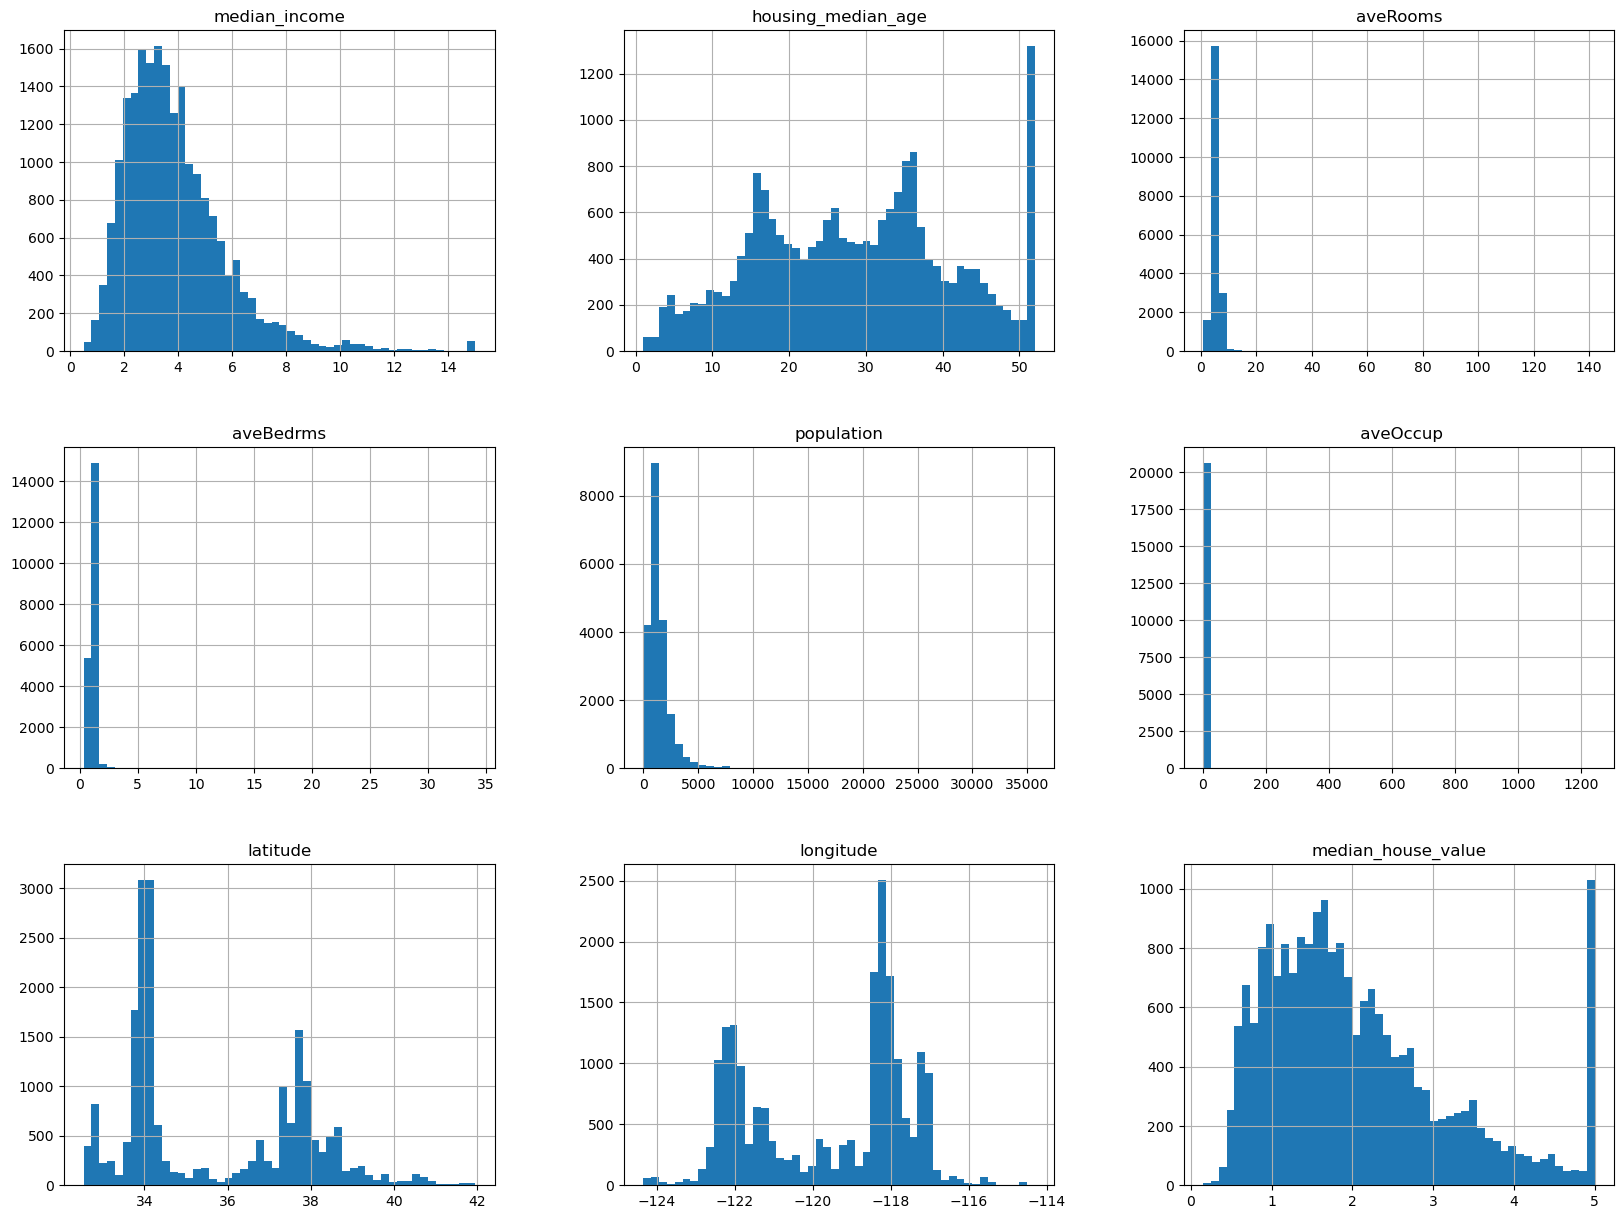

In [9]:
housing.hist(bins=50, figsize=(20,15));

**Observations from the histogram plots:**

1. The `median income` attribute does not look like it is expressed in US dollars (USD), but in units of 100k USD. Also, from the dataset metadata, we can read that the data has been scaled and capped at 15 (actually 15.0001) for higher median incomes, and at 0.5 (actually 0.4999) for lower median incomes.
2. The `housing median age` and the `median house value` were also capped. The latter may be a serious problem since it is our `target attribute` (label/ground truth). Our Deep Learning algorithm may learn that prices never go beyond that limit.

In a real life setting, we would need to evaluate if that could be a problem or not when we predict values (as our predictions could be way off for some cases to the real value, e.g. if you have a house that would be worth much more than \\$500,000). If precise predictions beyond \\$500,000 is needed, then we have mainly two options:

- a. Collect proper labels for the districts whose labels were capped.
- b. Remove those districts from the training set (and also from the test set, since your system should then not be penalized if it predicts values beyond $500,000).

3. The attributes have very *different scales* (value ranges). 
4. Finally, many histograms are *tail heavy*: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

## Visualize dataset

If the training dataset is very large, you may want to sample an exploration dataset, to make manipulations easy and fast. In our case, the dataset is quite small so you can just work directly on the full set.

Since the dataset contains geographical information (latitude and longitude), it is a good idea to create a scatterplot of all districts to visualize the data. For DataFrames, we can use the `plot()` method. In the following, the radius of each circle (district) represents the district’s population (parameter s), and the color represents the price (parameter c). We will use a predefined color map (parameter cmap) called jet, which ranges from blue (low values) to red (high prices). Setting the alpha parameter to 0.1 makes the plotted circles transparent, so that the visualization is much easier to perceive, and we can better visualize places where there is a high density of data points.

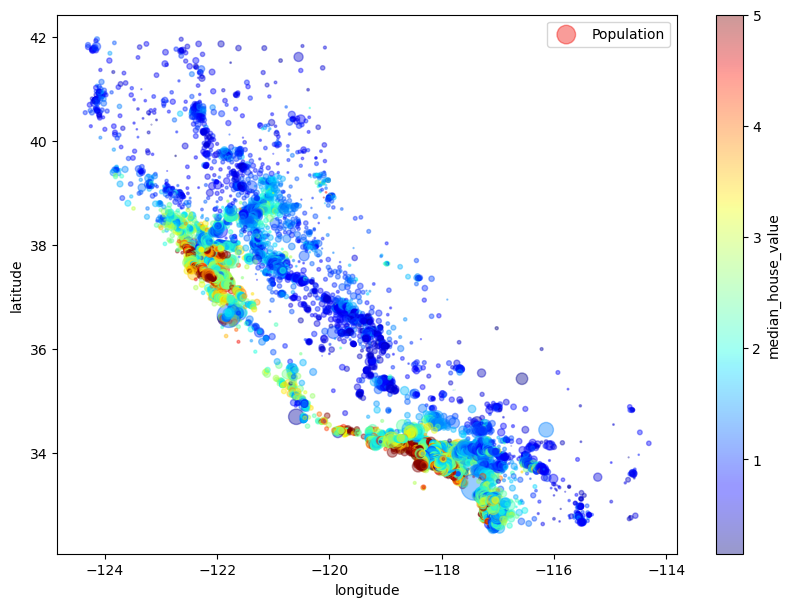

In [11]:
import matplotlib.pyplot as plt

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="Population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend();


This plot tells us that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density.

## Looking for Correlations

Since the dataset is not too large, you can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the `corr()` method:

In [12]:
corr_matrix = housing.corr()

corr_matrix

,median_income,housing_median_age,aveRooms,aveBedrms,population,aveOccup,latitude,longitude,median_house_value
median_income,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
housing_median_age,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
aveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
aveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
aveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
median_house_value,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


And extract the result for a specific column, like the target column of median house values, and sort them in descending order (largest first).

In [13]:
# Can the correlation between the individual attributes and the target value (median_house_value)
# affect the training. I believe instead of removing the coordinate values, we can touch either aveBedrms
# or aveOccup since the data is localized to califonia there is no need to remove X,y.

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
aveRooms              0.151948
housing_median_age    0.105623
 aveOccup            -0.023737
population           -0.024650
longitude            -0.045967
aveBedrms            -0.046701
latitude             -0.144160
Name: median_house_value, dtype: float64

The **correlation coefficient** ranges from –1 to 1 (and only measures linear correlations).
+ When it is close to **1**, it means that there is a **strong positive correlation**; for example, the median house value tends to go up when the median income goes up. (The value of 1 in the first row shows that the median house value is correlated with itself, which is no surprise.)
+ When the coefficient is close to –1, it means that there is a **strong negative correlation**; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north, which might have to do with the weather in California).
+ Finally, coefficients close to zero mean that there is no linear correlation.

We can plot some attributes in a scatterplot, to see these correlations.

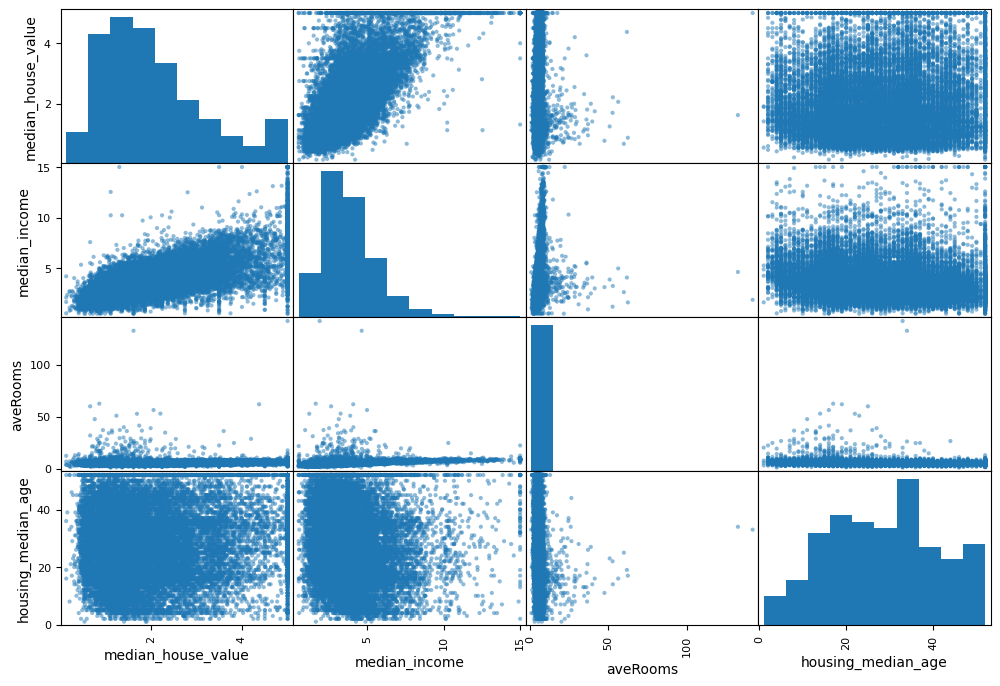

In [14]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "aveRooms",
              "housing_median_age"]
_ = scatter_matrix(housing[attributes], figsize=(12, 8))

The main diagonal (top left to bottom right) displays a histogram of each attribute (and not the correlation of each variable against itself, which would not be interesting). The most promising attribute to predict the `median house value` (strongest correlation as a perceivable line) is the `median income`, so let’s zoom in on their correlation scatterplot.

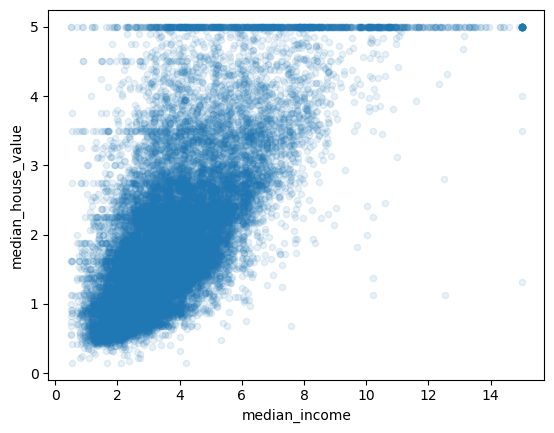

In [15]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1);

This plot reveals a few things:

- The correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed.
- The price cap that we noted earlier is clearly visible as a horizontal line at \\$500,000.
- This plot reveals other less obvious straight lines: a horizontal line around \\$450,000, another around \\$350,000, perhaps one around \\$280,000, and a few more below that.

In a real scenario, you may want to try to remove the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.

This concludes our data exploration, and we continue with learning a Deep Learning model to predict the house prices in part II of this exercise.